### About Data
##### Each record consists of three attributes:

##### is_sarcastic: 1 if the record is sarcastic otherwise 0
##### headline: the headline of the news article
##### article_link: link to the original news article. Useful for collecting supplementary data

## 1.Load the data

In [44]:
import json
import pandas as pd

In [166]:
def create_data(paths):
    sentences = []
    labels = []
    urls = []
    for path in paths:
        with open(path,"r") as f:
            for i in f.readlines():
                data = json.loads(i)
                sentences.append(data['headline'])
                labels.append(data['is_sarcastic'])
                urls.append(data['article_link'])
                
    df = pd.DataFrame({
        'sentences':sentences,
        'labels':labels,
        'urls':urls
    })
    return df

In [167]:
paths = ["Data/Sarcasm_Headlines_Dataset_v2.json"]#"Data/Sarcasm_Headlines_Dataset.json",
df= create_data(paths)

In [168]:
df

,sentences,labels,urls
0,thirtysomething scientists unveil doomsday clo...,1,https://www.theonion.com/thirtysomething-scien...
1,dem rep. totally nails why congress is falling...,0,https://www.huffingtonpost.com/entry/donna-edw...
2,eat your veggies: 9 deliciously different recipes,0,https://www.huffingtonpost.com/entry/eat-your-...
3,inclement weather prevents liar from getting t...,1,https://local.theonion.com/inclement-weather-p...
4,mother comes pretty close to using word 'strea...,1,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,jews to celebrate rosh hashasha or something,1,https://www.theonion.com/jews-to-celebrate-ros...
28615,internal affairs investigator disappointed con...,1,https://local.theonion.com/internal-affairs-in...
28616,the most beautiful acceptance speech this week...,0,https://www.huffingtonpost.com/entry/andrew-ah...
28617,mars probe destroyed by orbiting spielberg-gat...,1,https://www.theonion.com/mars-probe-destroyed-...


### For reference = Tokenize the data and create the data as a traning example

In [169]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [170]:
tokenizer = Tokenizer(oov_token="<OOV>")

In [171]:
tokenizer.fit_on_texts(df['sentences'])

In [172]:
tokenizer.word_index

{'<OOV>': 1,
 'to': 2,
 'of': 3,
 'the': 4,
 'in': 5,
 'for': 6,
 'a': 7,
 'on': 8,
 'and': 9,
 'with': 10,
 'is': 11,
 'new': 12,
 'trump': 13,
 'man': 14,
 'at': 15,
 'from': 16,
 'about': 17,
 'by': 18,
 'after': 19,
 'you': 20,
 'this': 21,
 'out': 22,
 'up': 23,
 'be': 24,
 'as': 25,
 'that': 26,
 'it': 27,
 'how': 28,
 'not': 29,
 'he': 30,
 'his': 31,
 'are': 32,
 'your': 33,
 'just': 34,
 'what': 35,
 'all': 36,
 'who': 37,
 'has': 38,
 'will': 39,
 'report': 40,
 'into': 41,
 'more': 42,
 'one': 43,
 'have': 44,
 'year': 45,
 'over': 46,
 'why': 47,
 'day': 48,
 'u': 49,
 'area': 50,
 'woman': 51,
 'can': 52,
 's': 53,
 'says': 54,
 'donald': 55,
 'time': 56,
 'first': 57,
 'like': 58,
 'no': 59,
 'her': 60,
 'get': 61,
 'off': 62,
 'old': 63,
 "trump's": 64,
 'life': 65,
 'now': 66,
 'people': 67,
 "'": 68,
 'an': 69,
 'house': 70,
 'still': 71,
 'obama': 72,
 'white': 73,
 'back': 74,
 'make': 75,
 'was': 76,
 'than': 77,
 'women': 78,
 'if': 79,
 'down': 80,
 'when': 81,
 '

In [173]:
sequences = tokenizer.texts_to_sequences(df['sentences'])

In [174]:
sequences

[[16004, 355, 3167, 7474, 2644, 3, 661, 1119],
 [7475, 1775, 758, 3168, 47, 239, 11, 1844, 1048, 8, 1528, 2154, 1845],
 [863, 33, 11427, 262, 16005, 647, 1484],
 [11428, 1594, 6418, 5665, 16, 143, 2, 152],
 [472, 495, 322, 922, 2, 572, 550, 16006, 6419],
 [83, 73, 11429],
 [84, 280, 2, 4182, 33, 2515, 10, 573, 1356],
 [1846, 16007, 777, 5063, 3169, 1120, 25, 227, 25, 1433, 3, 1434, 3359, 4183],
 [2961, 292, 143, 139, 1709, 2, 425, 5, 16008, 1595, 356, 1357],
 [2792, 3, 160, 115, 21, 7476],
 [21, 2645, 11, 3360, 7, 426, 5, 3580, 9, 69, 1006, 43, 15, 26],
 [7477, 11430, 648, 60, 536, 201, 11, 1358, 626, 16009],
 [35, 2, 115, 11431, 1710, 11432, 6, 1049],
 [574,
  1596,
  953,
  149,
  85,
  76,
  2,
  1776,
  6,
  9021,
  16010,
  7478,
  3,
  1149,
  3,
  11433],
 [1529, 4184, 12, 6420, 26, 1530, 11434, 8, 9022],
 [1318, 379, 7479, 9023, 5064, 80, 16, 13, 1711, 7480, 2155],
 [50, 433, 1150, 5666, 9, 2156, 2793, 3, 16011, 3361],
 [50, 14, 323, 100, 3, 31, 2261, 18, 11435],
 [537, 59, 411

In [175]:
padded = pad_sequences(sequences,padding='post')

In [176]:
print(padded[0])

[16004   355  3167  7474  2644     3   661  1119     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]


In [177]:
print(padded.shape)

(28619, 152)


2861.9

### 2. Create Data for traning and testing

In [211]:
vocab_size = 15000
embedding_dim = 128
max_length = 32
trunct_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
traning_size = 20000

In [212]:
traning_sentence = df['sentences'][0:traning_size]
training_label = df['labels'][0:traning_size]

testing_sentence = df['sentences'][traning_size:]
testing_label = df['labels'][traning_size:]

In [213]:
len(traning_sentence),len(training_label),len(testing_sentence),len(testing_label)

(20000, 20000, 8619, 8619)

In [214]:
traning_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
traning_tokenizer.fit_on_texts(traning_sentence)

In [215]:
traning_sequences = traning_tokenizer.texts_to_sequences(traning_sentence)
traning_padded = pad_sequences(traning_sequences, padding=padding_type ,maxlen=max_length, truncating=trunct_type)

In [216]:
testing_sequences = traning_tokenizer.texts_to_sequences(testing_sentence)
testing_padded = pad_sequences(testing_sequences, padding=padding_type ,maxlen=max_length, truncating=trunct_type)

### 3.Creating Model

In [224]:
from tensorflow.keras.layers import Embedding,LSTM,Dense,GlobalAvgPool1D,SpatialDropout1D,Dropout
from tensorflow.keras.models import Sequential

In [251]:
model = Sequential()

In [252]:
#model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
#model.add(GlobalAvgPool1D())
#model.add(Dense(24,activation='relu'))
#model.add(Dense(1,activation='sigmoid'))

#### OR both gives accuracy of 85% on testing data

In [253]:
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=traning_padded.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(units = 32 , activation='relu',dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [254]:
model.compile(optimizer= "adam", loss=['binary_crossentropy'],metrics=['accuracy'])

In [255]:
num_epochs = 7

In [256]:
history = model.fit(traning_padded,training_label,epochs=num_epochs,validation_data=(testing_padded,testing_label),verbose=2)

Epoch 1/7
625/625 - 29s - loss: 0.7830 - accuracy: 0.5780 - val_loss: 0.4973 - val_accuracy: 0.7856
Epoch 2/7
625/625 - 29s - loss: 0.3842 - accuracy: 0.8340 - val_loss: 0.3302 - val_accuracy: 0.8578
Epoch 3/7
625/625 - 31s - loss: 0.2435 - accuracy: 0.9071 - val_loss: 0.3346 - val_accuracy: 0.8598
Epoch 4/7
625/625 - 30s - loss: 0.1720 - accuracy: 0.9366 - val_loss: 0.3258 - val_accuracy: 0.8590
Epoch 5/7
625/625 - 28s - loss: 0.1319 - accuracy: 0.9542 - val_loss: 0.3677 - val_accuracy: 0.8552
Epoch 6/7
625/625 - 29s - loss: 0.0977 - accuracy: 0.9675 - val_loss: 0.3958 - val_accuracy: 0.8535
Epoch 7/7
625/625 - 29s - loss: 0.0689 - accuracy: 0.9779 - val_loss: 0.4771 - val_accuracy: 0.8463


In [257]:
import matplotlib.pyplot as plt
%matplotlib inline

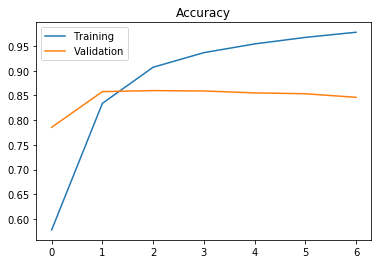

In [258]:
plt.plot(history.history['accuracy'],label="Training")
plt.plot(history.history['val_accuracy'],label="Validation")
plt.legend()
plt.title("Accuracy")
plt.show()

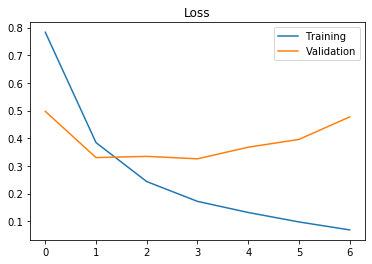

In [259]:
plt.plot(history.history['loss'],label="Training")
plt.plot(history.history['val_loss'],label="Validation")
plt.legend()
plt.title("Loss")
plt.show()

### 4.Prediction

In [260]:
testsentences = ["granny starting to fear spiders in the garden might be real","game of thrones seson finale showing this sunday night"]

In [261]:
sequences = traning_tokenizer.texts_to_sequences(testsentences)
padded_test = pad_sequences(sequences, padding=padding_type ,maxlen=max_length, truncating=trunct_type)

In [262]:
print(model.predict(padded_test))

[[0.7980917 ]
 [0.02105531]]
